In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('sample_us.csv')
rows = data.shape[0]
print(data.shape)
print(rows)
data.head()

(1201, 7)
1201


,pir_state,t_temp,field1,field2,field3,field4,count
0,1,28,"25.00,24.75,24.75,24.50,24.75,24.75,24.50,23.5...","26.75,26.75,27.50,26.00,27.25,27.25,25.25,26.2...","27.50,27.25,26.75,24.75,26.25,25.75,24.00,26.0...","28.00,28.75,25.75,24.75,24.50,25.25,24.25,25.5...",1
1,1,28,"25.00,24.00,24.75,24.50,25.00,25.25,25.75,24.5...","25.75,25.00,25.00,25.75,27.25,27.00,27.25,26.5...","24.50,24.75,24.50,24.75,25.50,27.25,28.00,26.5...","25.00,25.00,24.50,24.25,24.50,27.50,29.00,26.0...",1
2,0,30,"24.75,24.25,24.25,24.00,24.50,23.75,25.00,24.0...","25.00,24.50,24.25,25.25,26.75,26.25,24.75,25.7...","24.75,24.50,24.50,24.25,25.25,24.75,25.75,25.7...","25.00,25.00,24.50,23.75,24.00,24.00,24.25,25.7...",1
3,0,30,"25.25,24.25,24.75,24.00,24.50,24.25,24.50,24.5...","25.75,24.50,24.75,25.75,27.50,25.75,25.25,25.5...","24.75,24.75,24.50,24.00,25.75,25.00,24.50,25.2...","24.50,24.75,24.75,23.75,24.25,25.00,24.25,24.5...",1
4,0,29,"24.00,24.25,24.50,24.25,24.75,24.25,24.50,24.0...","25.50,25.00,24.50,26.00,27.50,25.75,24.75,25.2...","24.50,24.50,24.25,24.25,26.00,24.75,24.00,25.5...","24.75,24.75,23.75,23.50,24.00,24.00,24.25,24.5...",1


In [2]:
# converting the string type data present in csv file to float and storing it in row x 64 array.
# pir_state, t_temp, field1, field2 , field3, field4, count

temps = np.zeros((rows, 64)) #this contains 


def convert_it(g_field, index):
    row_index = 0

    for i in g_field:    
        col_index = index

        x = 0
        count = 0
        for j in i :     

            if j == ',':
                x = 0
            elif j == '.':
                count = 1        
            elif count > 0:
                x = x*10 + int(j)
                count = count + 1
            else :
                x = x*10 + int(j)
        
            if count >= 3:
                count = 0
                x = x/100.0
                temps[row_index][col_index] = x
                col_index = col_index + 1

        row_index = row_index + 1

convert_it(data.field1, 0)
convert_it(data.field2, 16)
convert_it(data.field3, 32)
convert_it(data.field4, 48)


In [3]:
#preparing training data
data.drop(['t_temp','field1','field2','field3','field4'],axis=1,inplace=True)
data.head()

,pir_state,count
0,1,1
1,1,1
2,0,1
3,0,1
4,0,1


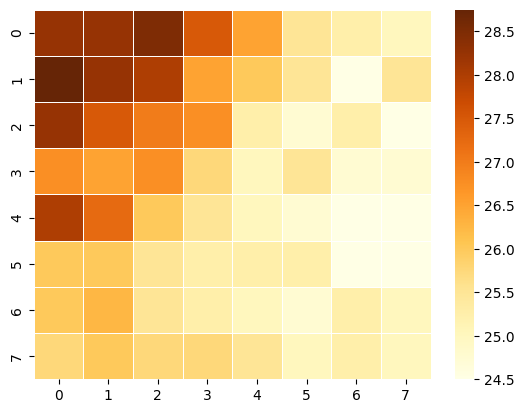

In [4]:
# trial = temps[800].reshape(8,8)
# ax = sns.heatmap(trial, linewidth=0.5, cmap = 'YlOrBr')
# plt.show()

# # coolwarm, YlGnBu, YlOrBr


25.8984375


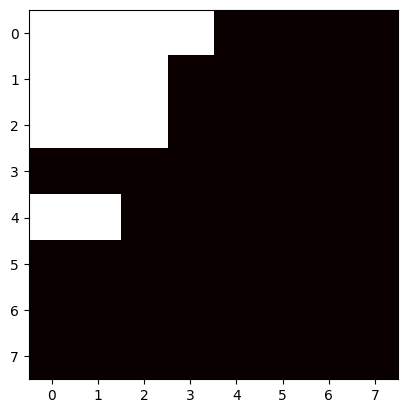

In [5]:
# avg_temp = np.average(trial)
# print(avg_temp)

# active_temp = avg_temp + 1 # 1.5 or 2

# cells = temps[800].reshape(8,8)

# for i in range(8):
#     for j in range(8):
#         if(cells[i][j] >= active_temp):
#             cells[i][j] = 1
#         else:
#             cells[i][j] = 0

# # ax = sns.heatmap(cells, linewidth=0.5, cmap = 'hot')
# # plt.show()

# plt.imshow( cells , cmap = 'hot' , interpolation = 'nearest' ) 

# plt.show()


In [6]:
# preparing data to train
data.head()


,pir_state,count
0,1,1
1,1,1
2,0,1
3,0,1
4,0,1


In [7]:

def doit(arr, count, visited, i, j):
    if(i < 0 or i > 7 or j < 0 or j > 7):return count 
    elif(visited[i][j] != 0):return count 
    elif(arr[i][j] == 0):return count 

    if(arr[i][j] == 1):
        visited[i][j] = 1
        arr[i][j] = 0
        count = count + 1
        count = doit(arr, count, visited, i+1, j)
        count = doit(arr, count, visited, i-1, j)
        count = doit(arr, count, visited, i, j+1)
        count = doit(arr, count, visited, i, j-1)

        return count



def find_blob_sizes(arr):
    visited = np.zeros((8,8))
    count = 0
    ret = []
    for i in range(8):
        for j in range(8):
            if visited[i][j] == 1:
                continue
            count = doit(arr, count, visited, i, j)
            if count > 0 :
                #print(count)
                ret.append(count)
                count = 0
    
    return ret 


# arr = np.array([[1, 1, 1, 0, 0, 0, 0, 1],
#                 [1,1,0,1,0,0,1,0],
#                 [1,0,0,1,0,0,0,0],
#                 [0,0,0,0,0,0,1,1],
#                 [0,0,0,1,1,1,1,1],
#                 [0,0,0,0,0,0,0,0],
#                 [1,1,1,1,1,1,1,1],
#                 [1,1,1,1,1,1,0,0]])


# ans = findSizes(arr)

# ans.sort(reverse = True)


# for i in ans:
#     print(i)
# print()


In [8]:

first_blob=[]
second_blob=[]
third_blob=[]
mean_list=[]
sd_list=[]
active_list=[]
for i in temps: # for each row in temps (64 values 1 D aray)

    avg_temp=np.average(i)
    cells=i.reshape(8,8) # this is 8x8 numpy array
    standard_deviation = np.std(cells) # calculate sd of the pixel matrix
    count_actv_cells = 0
    threshhold_temp = avg_temp + 1 #2 or 1.5 whatever
    for a in range(8):
        for r in range(8) :
            if( cells[a][r] >= threshhold_temp): 
                cells[a][r] = 1
                count_actv_cells+=1
            else: cells[a][r] = 0
    
    ans = find_blob_sizes(cells)   #This modifies cells and all values will be zero.
    ans.sort(reverse = True)
    
    # attributes to be used as independent variables
    if len(ans)>0:
        first = ans[0] # 1st biggest blob size
    else: first = 0
    if len(ans)>1:
        second = ans[1] # 2nd biggest blob size
    else :
        second =0
    if len(ans)>2:
        third = ans[2] # 3rd biggest blob size
    else: third = 0
    mean = avg_temp
    sd = standard_deviation # standard deviation
    active_cells = count_actv_cells
    #pir_status = its already there in dataframe.

    #adding data to column lists
    first_blob.append(first)
    second_blob.append(second)
    third_blob.append(third)
    mean_list.append(mean)
    sd_list.append(sd)
    active_list.append(active_cells)
    

data["first_blob"] = first_blob
data["second_blob"] = second_blob
data["third_blob"] = third_blob
data["mean"] = mean_list
data["sd"] = sd_list
data["no_of_active_cells"] = active_list

data.head()


,pir_state,count,first_blob,second_blob,third_blob,mean,sd,no_of_active_cells
0,1,1,14,4,0,25.675781,1.216488,18
1,1,1,13,0,0,25.617188,1.302018,13
2,0,1,3,1,0,24.804688,0.699426,4
3,0,1,2,0,0,24.886719,0.705627,2
4,0,1,6,0,0,24.699219,0.783347,6


In [9]:
# dependent and independent variables
# Putting feature variable to X
X=data.drop(['count'],axis=1)
# Putting response variable to y
y = data['count']

In [10]:
# Train-Test-Split 

# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape

((840, 7), (361, 7))

## Training the Model


In [11]:
# Using Random Forest Classifier algorithm to predict the weather
# Training model on test data

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=32,n_estimators=40,random_state=1)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

## Measuring accuracy

In [12]:
# Finding accuracy of model using test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.853185595567867

In [13]:
# To see importance of each variable in prediction
RF.feature_importances_

array([0.03598243, 0.1362249 , 0.0822044 , 0.03051061, 0.26789646,
       0.24118785, 0.20599335])